<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.4: Sentiment Analysis

This lab performs sentiment analysis on sentiment-labelled sentences using two types of feature extraction - a count vectoriser and TF-IDF vectoriser.

Based on the video tutorial **Text Classification with Machine Learning,SpaCy and Scikit(Sentiment Analysis)** by **Jesse E. Agbe (JCharis)**.

## Data Source: UCI
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

### Dataset
- [Sentiment Labelled Sentences Data Set](http://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

### Abstract
The dataset contains sentences labelled with positive or negative sentiment.

- Data Set Characteristics: Text
- Number of Instances: 3000
- Area: N/A
- Attribute Characteristics: N/A
- Number of Attributes: N/A
- Date Donated: 2015-05-30
- Associated Tasks: Classification
- Missing Values? N/A

### Source
Dimitrios Kotzias dkotzias '@' ics.uci.edu

### Data Set Information
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment.

### Format
sentence &lt;tab&gt; score &lt;newline&gt;

### Details
Score is either 1 (for positive) or 0 (for negative)

The sentences come from three different websites/fields:
- imdb.com
- amazon.com
- yelp.com

For each website, there exist **500 positive** and **500 negative** sentences. Those were selected randomly for larger datasets of reviews.

We attempted to select sentences that have a clearly positive or negative connotation, the goal was for no neutral sentences to be selected.

For the full datasets look:

- **imdb**: Maas et. al., 2011 _Learning word vectors for sentiment analysis_
- **amazon**: McAuley et. al., 2013 _Hidden factors and hidden topics: Understanding rating dimensions with review text_
- **yelp**: [Yelp dataset challenge](http://www.yelp.com/dataset_challenge)


### Attribute Information
The attributes are text sentences, extracted from reviews of products, movies, and restaurants

### Relevant Papers
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

### Citation Request
**From Group to Individual Labels using Deep Features**, Kotzias et. al,. KDD 2015

## Import libraries

In [1]:
## Import Libraries
import pandas as pd

import regex as re
import spacy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

## Load data

Load Yelp, Amazon and Imdb Data into dataframes. Create three column names 'text', 'sentiment' and 'source' (equal to one of 'yelp', 'imdb' or 'amazon' for each dataframe).

Hint: Source is separated by tabs and has no headers.

In [2]:
yelp_text = r'C:\Users\Vinitha\Desktop\IOD\DATA\yelp_labelled.txt'
imdb_text = r'C:\Users\Vinitha\Desktop\IOD\DATA\imdb_labelled_fixed.txt'
amazon_text = r'C:\Users\Vinitha\Desktop\IOD\DATA\amazon_cells_labelled.txt'

# ANSWER

def read_labeled_data(file_path):
    # Read the text file into a DataFrame
    # Assuming the format is: "text\tlabel" (tab-separated)
    data = pd.read_csv(file_path, header=None, names=['text', 'label'], delimiter='\t')
    return data

In [3]:
# Read the data from each file
yelp_data = read_labeled_data(yelp_text)
imdb_data = read_labeled_data(imdb_text)
amazon_data = read_labeled_data(amazon_text)

# Display the first few rows of each dataset
print("Yelp Data:")
print(yelp_data.head())

print("\nIMDb Data:")
print(imdb_data.head())

print("\nAmazon Data:")
print(amazon_data.head())

Yelp Data:
                                                text  label
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

IMDb Data:
                                                text  label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1

Amazon Data:
                                                text  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  

## Inspect the data

Check your datasets.

In [4]:
# Open and read the IMDb labeled data file
with open(yelp_text, 'r', encoding='utf-8') as file:
    content = file.read(1000)  # Read the first 1000 characters

print(content)

Wow... Loved this place.	1
Crust is not good.	0
Not tasty and the texture was just nasty.	0
Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.	1
The selection on the menu was great and so were the prices.	1
Now I am getting angry and I want my damn pho.	0
Honeslty it didn't taste THAT fresh.)	0
The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.	0
The fries were great too.	1
A great touch.	1
Service was very prompt.	1
Would not go back.	0
The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.	0
I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!	1
I was disgusted because I was pretty sure that was human hair.	0
I was shocked because no signs indicate cash only.	0
Highly recommended.	1
Waitress was a little slow in service.	0
This place is not worth your time, let alone Vegas.	0
did not like at all.	0
The Burrittos Blah!	0
The food, amazin

In [5]:
# ANSWER
# Open and read the IMDb labeled data file
with open(imdb_text, 'r', encoding='utf-8') as file:
    content = file.read(1000)  # Read the first 1000 characters

print(content)

A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  	0
Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  	0
Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  	0
Very little music or anything to speak of.  	0
The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  	1
The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  	0
Wasted two hours.  	0
Saw the movie today and thought it was a good effort, good messages for kids.  	1
A bit predictable.  	0
Loved the casting of Jimmy Buffet as the science teacher.  	1
And those baby owls were adorable.  	1
The movie showed a lot of Florida at it's best, made it look very appealing.  	1
The Songs Were The Best And The M

In [6]:
# ANSWER
# Open and read the IMDb labeled data file
with open(amazon_text, 'r', encoding='utf-8') as file:
    content = file.read(1000)  # Read the first 1000 characters

print(content)

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

## Merge the data

Merge all three datasets.

In [7]:
# ANSWER
df = pd.concat([yelp_data, imdb_data, amazon_data], ignore_index=True)

In [9]:
df.head()

,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Prepare the stage
- Load spaCy

In [10]:
nlp = spacy.load('en_core_web_sm')

## Prepare the text
All the text handling and preparation concerned with the changes and modifications from the raw source text to a format that will be used for the actual processing, things like:
- handle encoding
- handle extraneous and international characters
- handle symbols
- handle metadata and embedded information
- handle repetitions (such multiple spaces or newlines)

Clean text.

In [11]:
def clean_text(text):
    # reduce multiple spaces and newlines to only one
    text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
    # remove double quotes
    text = re.sub(r'"', '', text)

    return text

In [12]:
# Apply the clean_text function to your dataset.
# ANSWER

df['text'] = df['text'].apply(clean_text)
df.head()

,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Work the text
Using techniques learned in previous labs, remove StopWords, punctuation, and digits. Entities can be retained. Return the lemmatised form of any remaining words in lower case form.

This removes meaningless information.

In [13]:
# Complete the function
def convert_text(text):
    '''
    Use techniques learned in previous labs.
    1) Remove StopWords, Punctuation and digits.
    2) Retain entities.
    3) Return the lemmatised form of remaining words in lower case form.
    '''
    return text

In [14]:
%%time
df['short'] = df['text'].apply(convert_text)

CPU times: total: 0 ns
Wall time: 999 µs


In [15]:
df.sample(10)

,text,label,short
2619,Worked very well paired with a Treo 700w and a...,1,Worked very well paired with a Treo 700w and a...
830,Do yourself a favor and stay away from this dish.,0,Do yourself a favor and stay away from this dish.
1383,The sets (especially designed to work with the...,1,The sets (especially designed to work with the...
17,Waitress was a little slow in service.,0,Waitress was a little slow in service.
1285,Summary: The witticisms weren't witty.,0,Summary: The witticisms weren't witty.
294,I didn't know pulled pork could be soooo delic...,1,I didn't know pulled pork could be soooo delic...
604,Couldn't ask for a more satisfying meal.,1,Couldn't ask for a more satisfying meal.
639,This is a good joint.,1,This is a good joint.
1352,It is shameful.,0,It is shameful.
2252,It's very attractive and appears to be of good...,1,It's very attractive and appears to be of good...


## Split the dataset

In [16]:
print(df.columns)

Index(['text', 'label', 'short'], dtype='object')


In [17]:
# Features and Labels
X = df['short']
y = df['label']

# Apply a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Create a Bag-of-Words Model

In [18]:
# create a matrix of word counts from the text
counts = CountVectorizer()

In [19]:
# do the actual counting
A = counts.fit_transform(X_train, y_train)

In [20]:
# create a classifier using SVC
classifier = SVC(kernel='linear', probability=True)

In [21]:
# train the classifier with the training data
classifier.fit(A, y_train)

SVC(kernel='linear', probability=True)

In [22]:
# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = counts.transform(X_test)

In [23]:
# make predictions based on the test data
predictions = classifier.predict(B)

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B)[:, 1]

In [24]:
# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8167


## Repeat using TF-IDF
TF-IDF = Term Frequency - Inverse Document Frequency

In [25]:
# create a matrix of word counts from the text
# use TF-IDF
tfidf = TfidfVectorizer()
# do the actual counting
A = tfidf.fit_transform(X_train, y_train)

# train the classifier with the training data
classifier.fit(A, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
B = tfidf.transform(X_test)

# make predictions based on the test data
predictions = classifier.predict(B)

# store probabilities of predictions being 1
probabilities = classifier.predict_proba(B)[:, 1]

# check the accuracy
print('Accuracy: %.4f' % accuracy_score(y_test, predictions))

Accuracy: 0.8333


## Defining a helper function to show results and charts

In [26]:

def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, probabilities)
    average_precision = average_precision_score(actual, probabilities)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

    return (accuracy_, precision_, recall_, roc_auc_)

## Repeating it all for comparison
Repeat the whole lot in one big block using the show_summary_report function.

Find 'Accuracy', 'Precision', 'Recall', 'ROC_AUC' using CountVectorizer and TfidfVectorizer and keep the result in a dataframe.

Accuracy : 0.8333 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8377 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8322 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9098                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


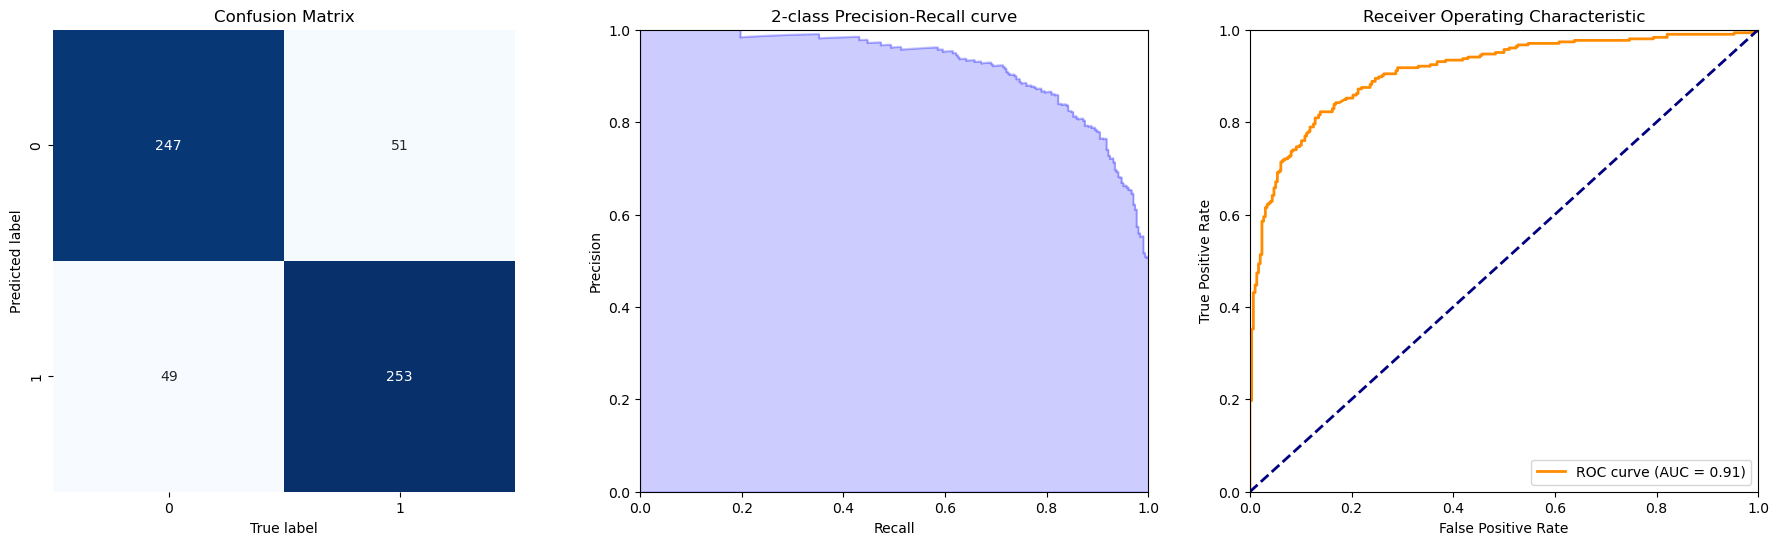

(0.8333333333333334,
 0.8377483443708609,
 0.8322368421052632,
 0.9097617354196301)

In [43]:
 show_summary_report(y_test, predictions, probabilities)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



